# Forest Fires Data Wrangling

This notebook's purpose will be to load, explore, and understand the data set about the forest fires in a northeast area of Portugal. The source of the data is located here: https://archive.ics.uci.edu/dataset/162/forest+fires

# Importing Libraries and Packages

Firstly we import all needed libraries and read the raw data

In [3]:
import pandas as pd
import matplotlib as plt

datafile = pd.read_csv("../data/raw/forestfires.csv")

We then visualize all the information about the data frame

In [4]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
datafile.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Droping column 

Upon observation of the columns we identify that the column date won't be needed for our analysis therefore we decide to drop it.


In [8]:
datafile.drop("day", axis=1)

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Identifying Nulls

After running the code it was possible to observe that there are no null rows so we can keep all columns intact

In [ ]:
datafile.isna().sum()

X                 0
Y                 0
month             0
day               0
Moisture          0
DMC               0
DC                0
Initial Spread    0
temp              0
RH                0
wind              0
rain              0
Burned Area       0
dtype: int64

Visualizing the data

Here, we are going to look at how some of the information is organized and see if there are any features based on these distributions and our domain knowledge that can be removed from the modeling dataset.

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'Moisture'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'Initial Spread'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

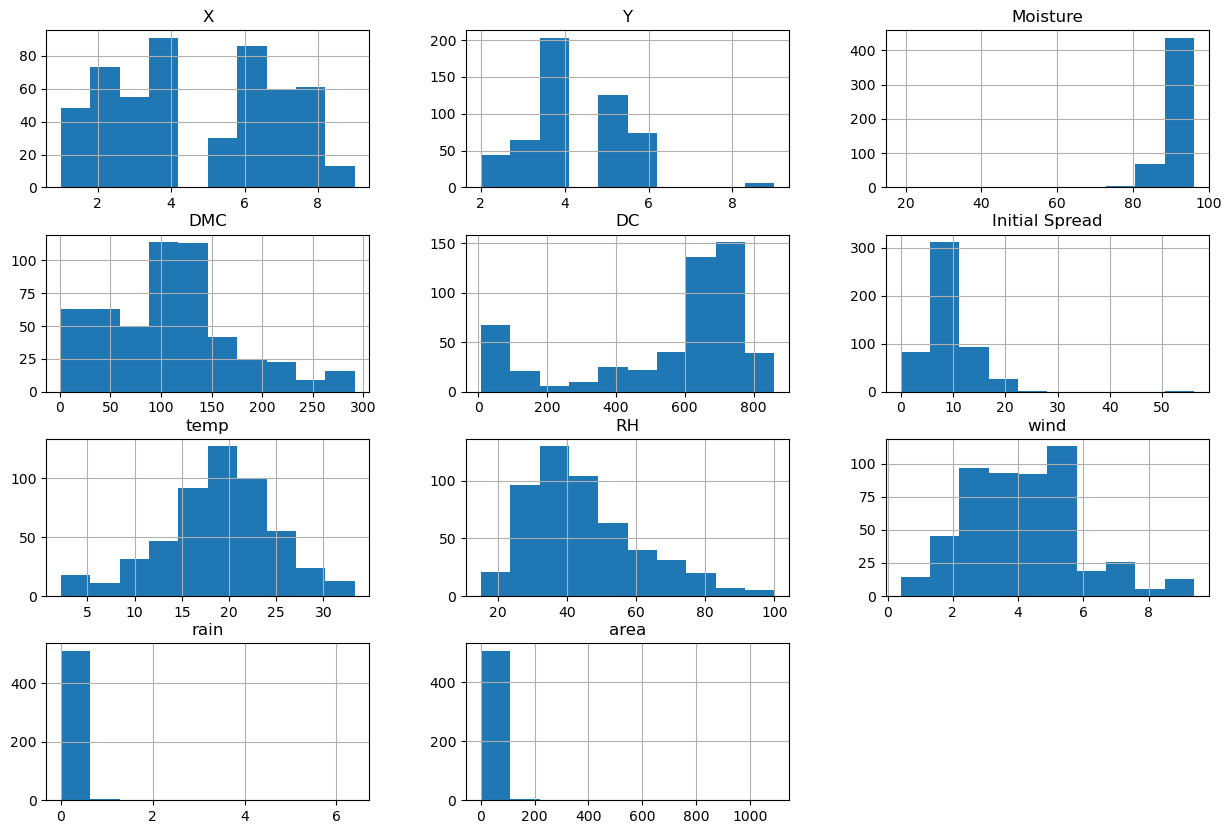

In [ ]:
datafile.hist(figsize = (15,10))


##Saving Wrangled Data

On the following code I will be saving the progess of our wrangled data

In [ ]:
datafile.to_csv("../data/processed/fires.csv")